<zipfile.ZipFile file=<_io.BytesIO object at 0x0000027824C925E0> mode='r'>
The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

Creator "Mark Newman on Sat Jul 22 05:32:16 2006"
graph
[
  directed 0
  node
  [
    id 0
    label "BrighamYoung"
    value 7
  ]
  node
  [
    

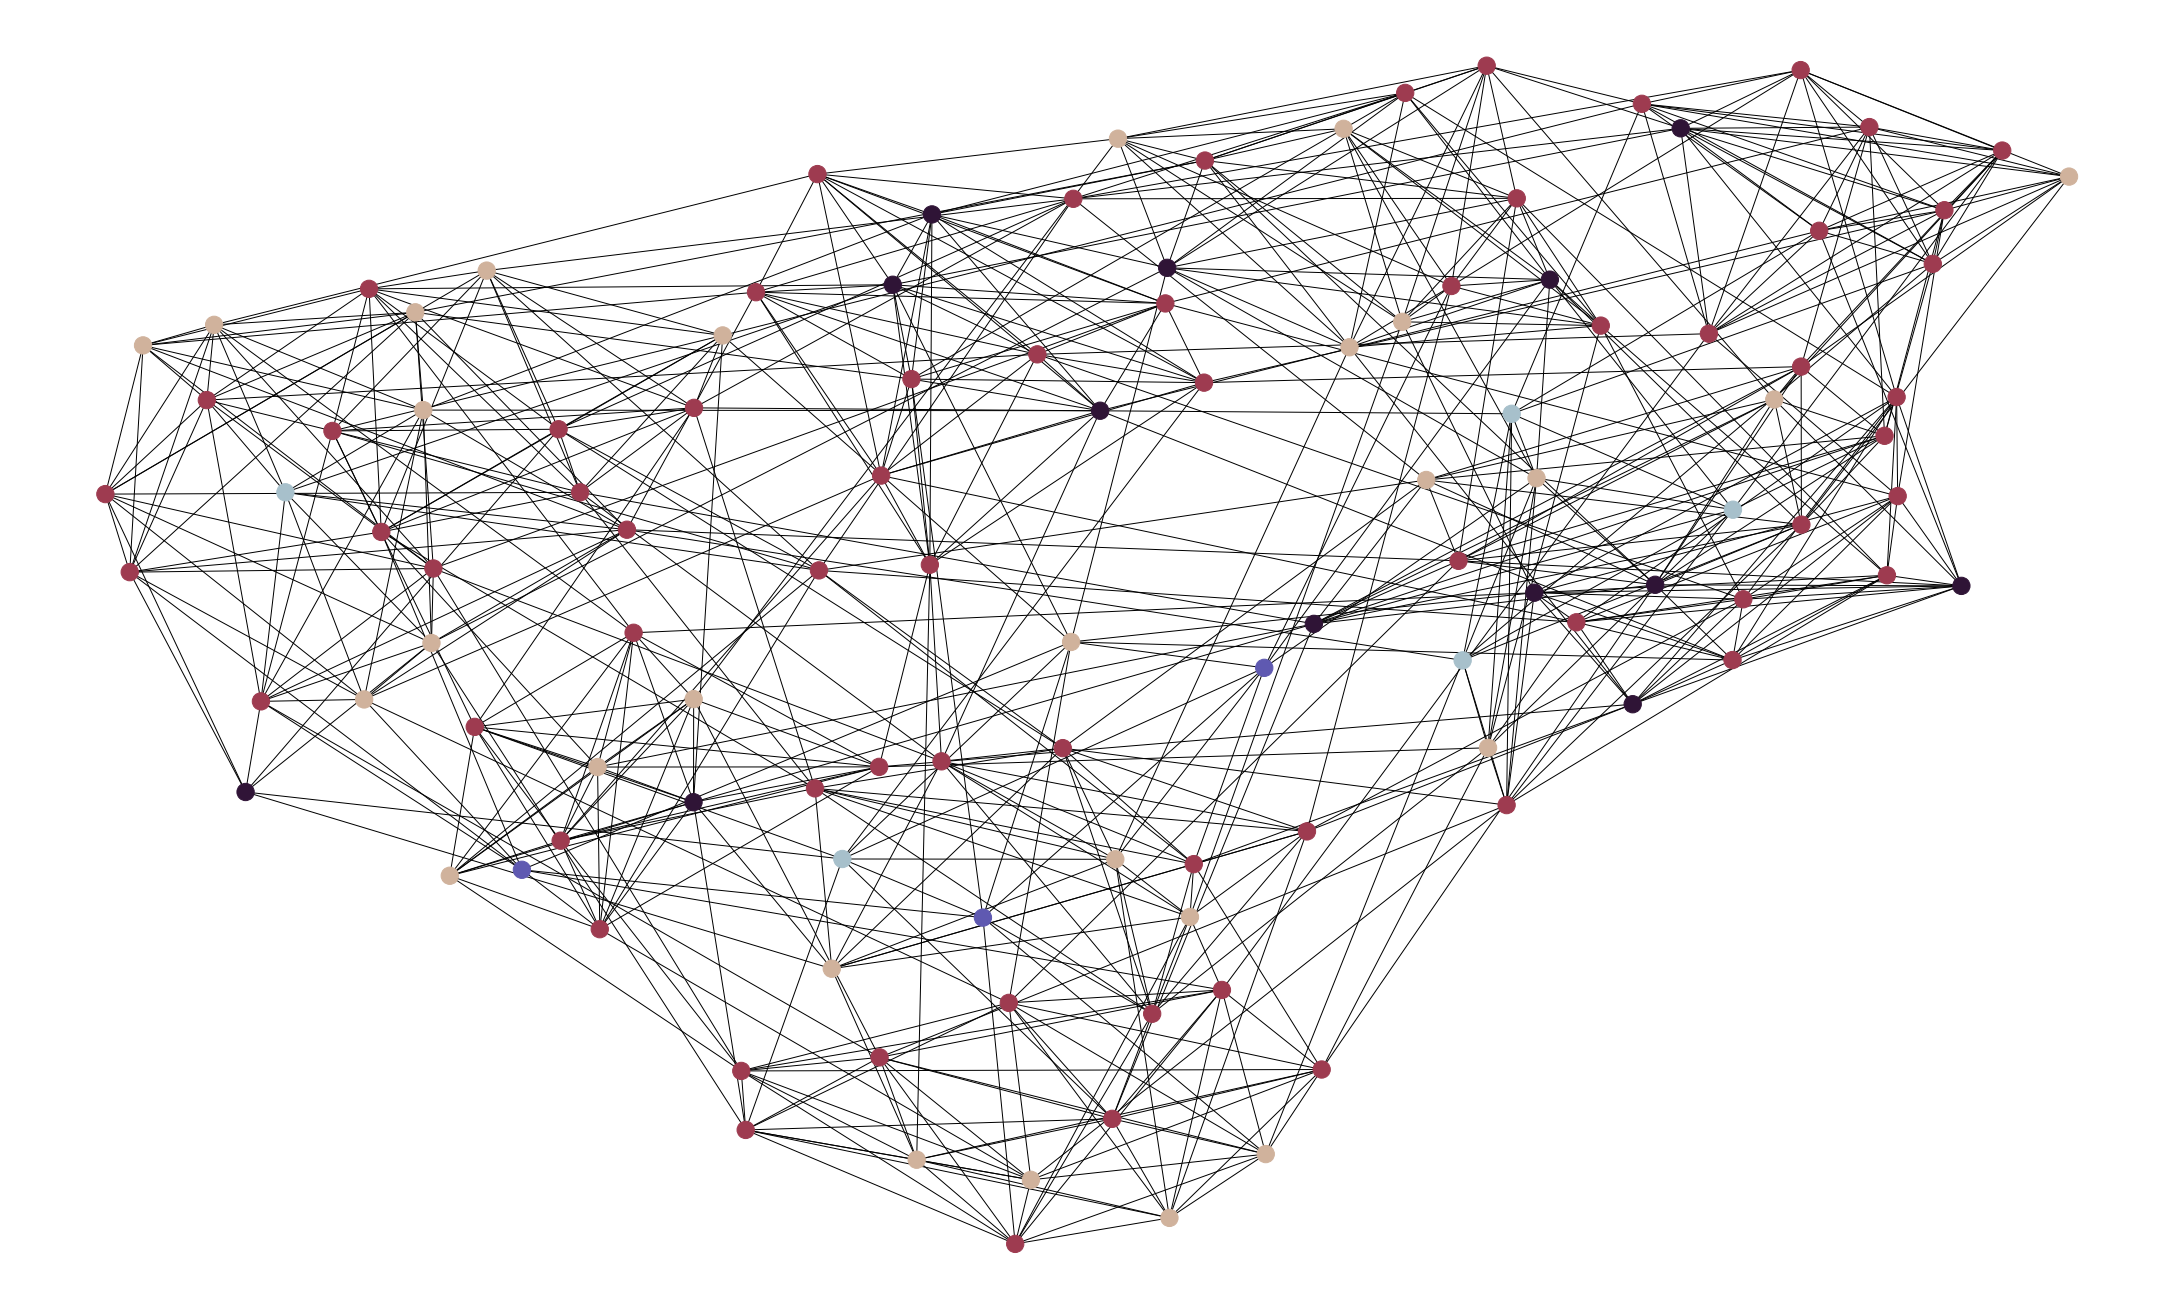

In [32]:
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"
from six.moves import urllib
import io
import zipfile
import networkx as nx
import matplotlib as mpl
import matplotlib.cm
import matplotlib.pyplot as plt
import numpy as np
sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
print(zf)
txt = zf.read("football.txt").decode()  # read info file
print(txt)
gml = zf.read("football.gml").decode()  # read gml data

print(gml)
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
#print(gml)
G = nx.parse_gml(gml)  # parse gml data


d = dict(G.degree)
print(d)
low, *_, high = sorted(d.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.twilight_shifted)

options = {
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
}

plt.figure(figsize =(30, 18))
nx.draw(G, 
        nodelist=d,
        node_color=[mapper.to_rgba(i) 
                    for i in d.values()])
plt.show()

In [16]:
def GetGraphMetrics(graph):
    
    graph_degree = dict(graph.degree)
    print("Graph Summary:")
    print(f"Number of nodes : {len(graph.nodes)}")
    print(f"Number of edges : {len(graph.edges)}")
    print(f"Maximum degree : {np.max(list(graph_degree.values()))}")
    print(f"Minimum degree : {np.min(list(graph_degree.values()))}")
    print(f"Average degree : {np.mean(list(graph_degree.values()))}")
    print(f"Median degree : {np.median(list(graph_degree.values()))}")
    print("")
    print("Graph Connectivity")
    try:
        print(f"Connected Components : {nx.number_connected_components(graph)}")
    except:
        print(f"Strongly Connected Components : {nx.number_strongly_connected_components(graph)}")
        print(f"Weakly Connected Components : {nx.number_weakly_connected_components(graph)}")
    print("")
    print("Graph Distance")
    print(f"Average Distance : {nx.average_shortest_path_length(graph)}")
    print(f"Diameter : {nx.algorithms.distance_measures.diameter(graph)}")
    print("")
    print("Graph Clustering")
    print(f"Transitivity : {nx.transitivity(graph)}")
    print(f"Average Clustering Coefficient : {nx.average_clustering(graph)}")
    
    
    return None

GetGraphMetrics(G)

Graph Summary:
Number of nodes : 115
Number of edges : 613
Maximum degree : 12
Minimum degree : 7
Average degree : 10.660869565217391
Median degree : 11.0

Graph Connectivity
Connected Components : 1

Graph Distance
Average Distance : 2.5081617086193746
Diameter : 4

Graph Clustering
Transitivity : 0.4072398190045249
Average Clustering Coefficient : 0.40321601104209814


<ipython-input-18-fbb2ec303a3b>:8: RuntimeWarning: divide by zero encountered in log
  ax2 = sns.histplot(np.log(degree_freq), stat='frequency', kde=True, ax=ax2)
C:\Users\navee\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


ValueError: autodetected range of [-inf, 4.189654742026425] is not finite

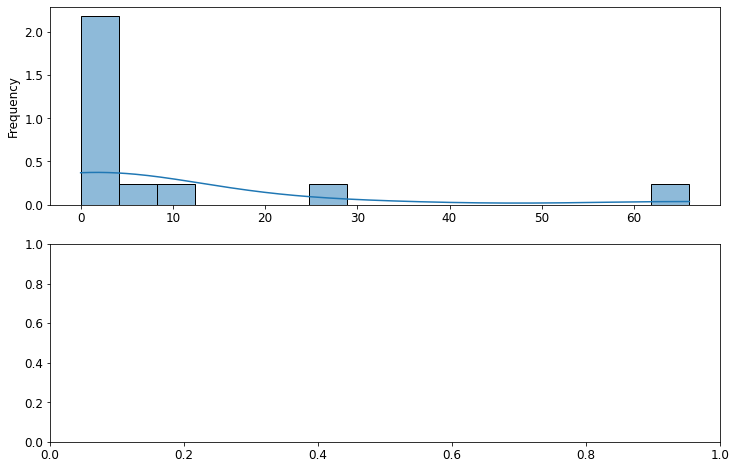

In [18]:
import seaborn as sns
degree_freq = np.array(nx.degree_histogram(G)).astype('float')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plt.rcParams.update({'font.size': 12})

ax1 = sns.histplot(degree_freq, stat='frequency', kde=True, ax=ax1)
ax2 = sns.histplot(np.log(degree_freq), stat='frequency', kde=True, ax=ax2)
ax1.set(ylabel="Frequency", xlabel="Degree")
ax2.set(ylabel="Frequency", xlabel="Log Degree")
plt.show()